## Siddhardha - CS20B1063

Dataset - Can be downloaded from keras or pytorch directly similar to MNIST.

Implement the ANN for classifying the images from CIFAR-10 dataset. Steps to be followed are as follows -

- Flatten the input image dimensions to 1D (width pixels x height pixels)
- Normalize the image pixel values (divide by 255)
- One-Hot Encode the categorical column
- Build a model architecture (Sequential) with Dense layers(Fully connected layers)
- Train the model and make predictions


Information about the dataset -

The CIFAR-10 dataset consists of 60,000 32 x 32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. The important points that distinguish this dataset from MNIST are:

- Images are colored in CIFAR-10 as compared to the black-and-white texture of MNIST
- Each image is 32 x 32 pixel
- 50,000 training images and 10,000 testing images

Now, these images are taken in varying lighting conditions and at different angles, and since these are colored images, you will see that there are many variations in the color itself of similar objects (for example, the color of ocean water).

In [150]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.datasets import cifar10
import keras
from sklearn.metrics import confusion_matrix
import random

print("Imported the required libraries")

Imported the required libraries


In [151]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [152]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [153]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [154]:
print("Number of classes: ", len(np.unique(y_train)))

Number of classes:  10


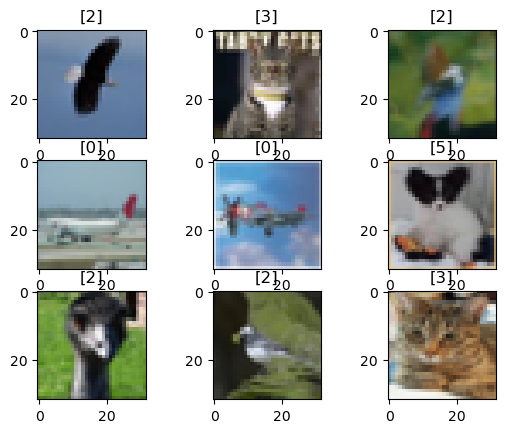

In [155]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    choice = random.choice(range(10000))
    plt.imshow(X_train[choice])
    plt.title(y_train[choice])
plt.show()

In [156]:
X_train.shape

(50000, 32, 32, 3)

In [157]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [158]:
# flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [159]:
X_train.shape

(50000, 3072)

In [160]:
X_train

array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.13725491, 0.69803923, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.7411765 , 0.827451  , 0.9411765 , ..., 0.7647059 , 0.74509805,
        0.67058825],
       [0.8980392 , 0.8980392 , 0.9372549 , ..., 0.6392157 , 0.6392157 ,
        0.6313726 ]], dtype=float32)

In [161]:
# one hot encode the target variables
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [162]:
# create the model using the Sequential API
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(1024, activation="relu", input_shape=(3072,)))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [163]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_42 (Dense)            (None, 512)               524800    
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 dense_44 (Dense)            (None, 128)               32896     
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 10)                650       
                                                                 
Total params: 3,844,682
Trainable params: 3,844,682
No

In [164]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [165]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
782/782 [==============================] - 40s 49ms/step - loss: 1.9173 - accuracy: 0.2954
Epoch 2/50
782/782 [==============================] - 37s 48ms/step - loss: 1.7118 - accuracy: 0.3810
Epoch 3/50
782/782 [==============================] - 38s 49ms/step - loss: 1.6266 - accuracy: 0.4140
Epoch 4/50
782/782 [==============================] - 51s 65ms/step - loss: 1.5616 - accuracy: 0.4378
Epoch 5/50
782/782 [==============================] - 44s 57ms/step - loss: 1.5120 - accuracy: 0.4554
Epoch 6/50
782/782 [==============================] - 44s 56ms/step - loss: 1.4678 - accuracy: 0.4735
Epoch 7/50
782/782 [==============================] - 42s 54ms/step - loss: 1.4378 - accuracy: 0.4841
Epoch 8/50
782/782 [==============================] - 40s 51ms/step - loss: 1.4057 - accuracy: 0.4934
Epoch 9/50
782/782 [==============================] - 48s 61ms/step - loss: 1.3739 - accuracy: 0.5061
Epoch 10/50
782/782 [==============================] - 44s 56ms/step - loss: 1.340

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

1. val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

2. val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

3. val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

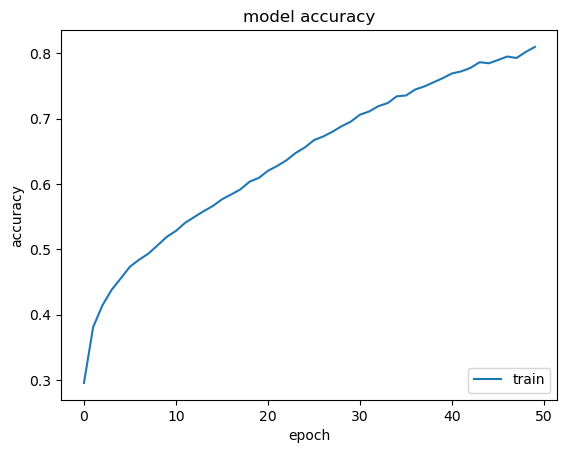

In [166]:
plt.plot(history.history["accuracy"])
# plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="lower right")

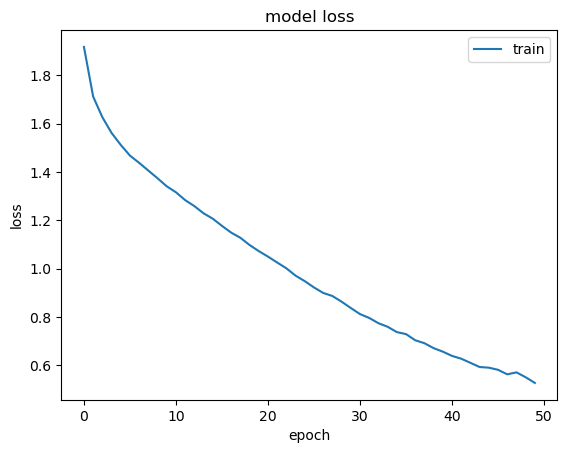

In [167]:
plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"], label="Validation Accuracy")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")

In [168]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

313/313 [==============================] - 3s 7ms/step - loss: 2.4391 - accuracy: 0.4834
Test accuracy: 0.48339998722076416
Test loss: 2.43906569480896


In [169]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [170]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

conf_matrix

array([[642,  24,  56,  38,  44,  16,  21,  11, 109,  39],
       [ 76, 589,  24,  24,  19,  23,  15,  19,  71, 140],
       [ 86,  19, 398,  98, 161,  66,  93,  38,  23,  18],
       [ 35,  24, 121, 350,  78, 169, 123,  34,  29,  37],
       [ 62,   8, 190,  72, 433,  45,  94,  54,  33,   9],
       [ 35,  12, 111, 259,  85, 331,  75,  48,  19,  25],
       [ 11,  13, 115,  93, 134,  45, 532,  19,   9,  29],
       [ 61,  20,  94,  68, 125,  88,  41, 452,  11,  40],
       [155,  57,  23,  34,  33,  16,  18,  12, 609,  43],
       [ 78, 166,  28,  44,  20,  16,  28,  37,  85, 498]], dtype=int64)

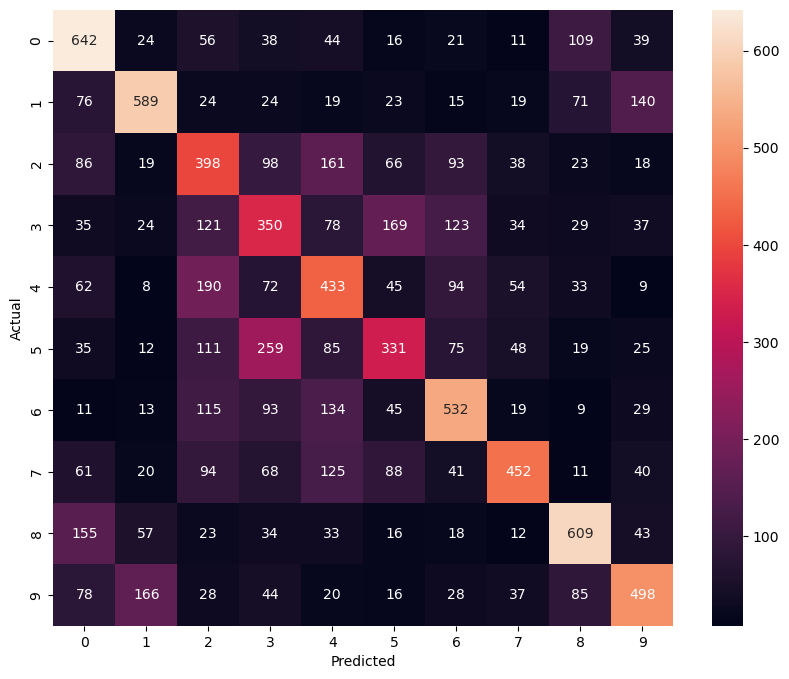

In [171]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1/1 [==============================] - 0s 26ms/step


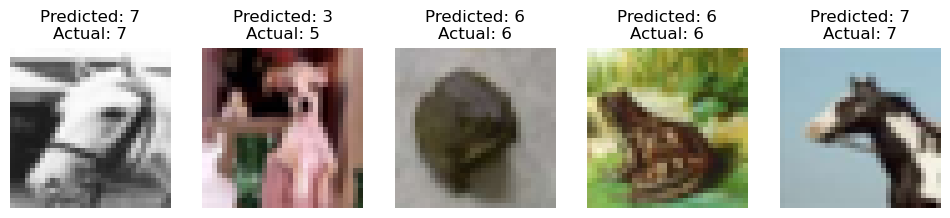

In [175]:
# Display random images with predicted and actual labels
def display_predictions(images, labels):
    num_images = 5
    rand_idx = np.random.randint(0, len(images), num_images)  # Random indices
    images = images[rand_idx]  # Select random images based on indices
    labels = labels[rand_idx]

    predictions = model.predict(images)

    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(32, 32, 3))
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(labels[i])
        plt.title(f"Predicted: {pred_label}\nActual: {true_label}")
        plt.axis("off")
    plt.show()


display_predictions(X_test, y_test)